In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv("C:\\Users\\esha\\Creditcard\\fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [5]:
df.shape

(555719, 23)

In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  object 
 6   city                   555719 non-null  object 
 7   zip                    555719 non-null  int64  
 8   lat                    555719 non-null  float64
 9   long                   555719 non-null  float64
 10  city_pop               555719 non-null  int64  
 11  job                    555719 non-null  object 
 12  dob                    555719 non-null  object 
 13  merch_lat              555719 non-null  float64
 14  merch_long             555719 non-nu

In [11]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [12]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,12,Sunday,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,12,Sunday,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,12,Sunday,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,12,Sunday,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,12,Sunday,6


In [13]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [14]:
df[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


In [15]:
#Date of birth --> current age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age_cust'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,Sunday,6,52
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,Sunday,6,30
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,Sunday,6,50
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,Sunday,6,33
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,Sunday,6,65


In [16]:
df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
df['long_dist'] = abs(round(df['merch_long']-df['long'],2))

In [17]:
df.drop(columns=['lat','long','merch_lat','merch_long','trans_date_trans_time'],inplace=True)

In [18]:
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age_cust,lat_dist,long_dist
0,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,0,12,Sunday,6,52,0.02,0.27
1,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",0,12,Sunday,6,30,0.87,0.48
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,34496,"Librarian, public",0,12,Sunday,6,50,0.18,0.66
3,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,54767,Set designer,0,12,Sunday,6,33,0.24,0.06
4,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,1126,Furniture designer,0,12,Sunday,6,65,0.71,0.87


In [19]:
df.describe()

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist
count,5.557190e+05,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,8.822189e+04,0.003860,12.809062,9.508536,46.636237,0.500280,0.500160
std,1.309837e+18,156.745941,26855.283328,3.003909e+05,0.062008,6.810924,1.978205,17.418528,0.288596,0.288755
min,6.041621e+10,1.000000,1257.000000,2.300000e+01,0.000000,0.000000,6.000000,15.000000,0.000000,0.000000
25%,1.800429e+14,9.630000,26292.000000,7.410000e+02,0.000000,7.000000,8.000000,33.000000,0.250000,0.250000
50%,3.521417e+15,47.290000,48174.000000,2.408000e+03,0.000000,14.000000,10.000000,45.000000,0.500000,0.500000
75%,4.635331e+15,83.010000,72011.000000,1.968500e+04,0.000000,19.000000,12.000000,58.000000,0.750000,0.750000
max,4.992346e+18,22768.110000,99921.000000,2.906700e+06,1.000000,23.000000,12.000000,96.000000,1.000000,1.000000


In [20]:
df.describe(include='object')

,merchant,category,gender,city,job,day
count,555719,555719,555719,555719,555719,555719
unique,693,14,2,849,478,7
top,Kilback LLC,gas_transport,F,Birmingham,Film/video editor,Monday
freq,1859,56370,304886,2423,4119,115136


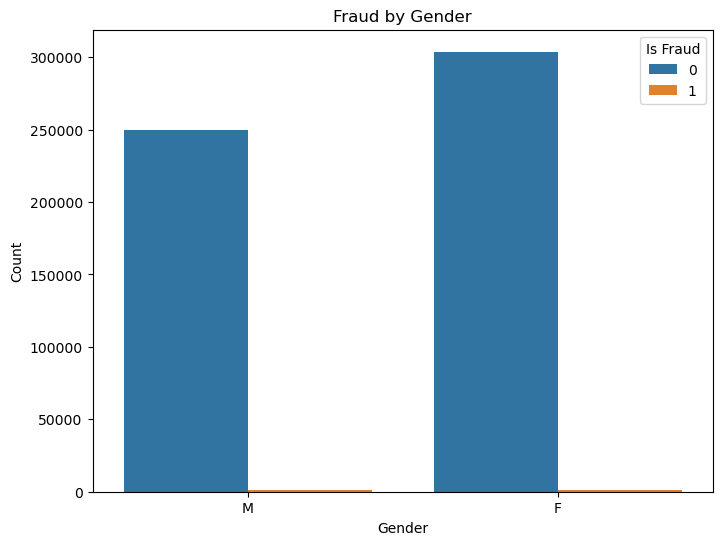

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = df)
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()

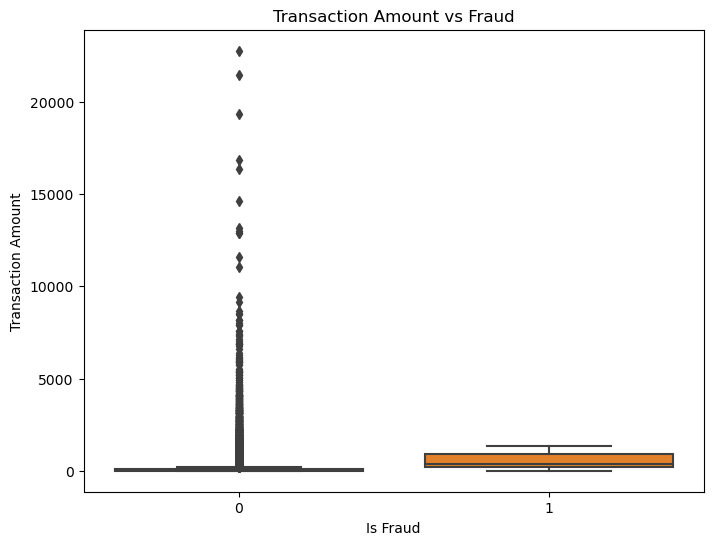

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

In [23]:
fraud_count_merch = df.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lemke-Gutmann'),
  Text(1, 0, 'Mosciski, Ziemann and Farrell'),
  Text(2, 0, 'Romaguera, Cruickshank and Greenholt'),
  Text(3, 0, 'Heathcote, Yost and Kertzmann'),
  Text(4, 0, 'Schultz, Simonis and Little'),
  Text(5, 0, 'Bashirian Group'),
  Text(6, 0, 'Boyer PLC'),
  Text(7, 0, 'Heathcote LLC'),
  Text(8, 0, 'Kilback LLC'),
  Text(9, 0, 'Medhurst PLC')])

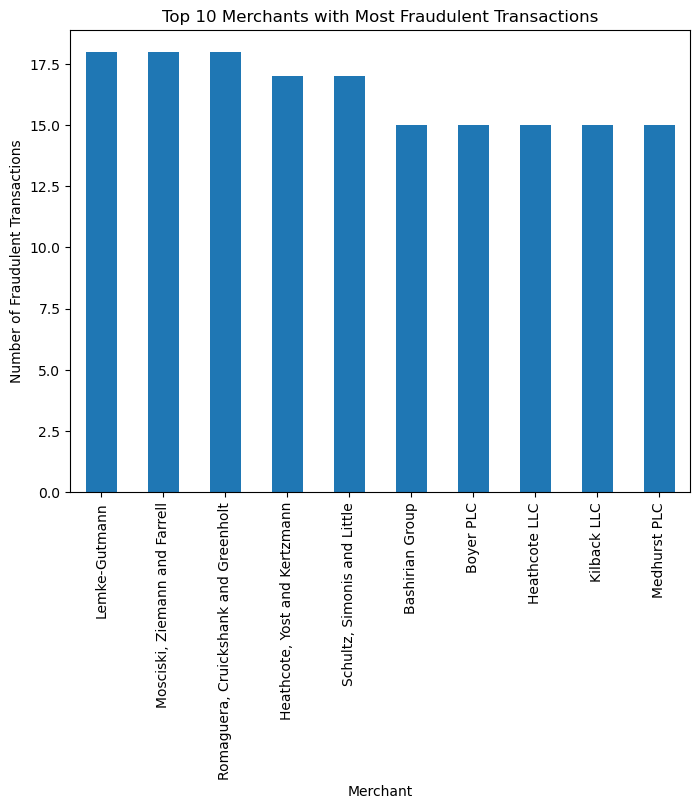

In [24]:
plt.figure(figsize=(8,6))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [25]:
fraud_counts_cat = df.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'shopping_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'misc_net'),
  Text(3, 0, 'shopping_pos'),
  Text(4, 0, 'gas_transport'),
  Text(5, 0, 'misc_pos'),
  Text(6, 0, 'personal_care'),
  Text(7, 0, 'home'),
  Text(8, 0, 'kids_pets'),
  Text(9, 0, 'entertainment')])

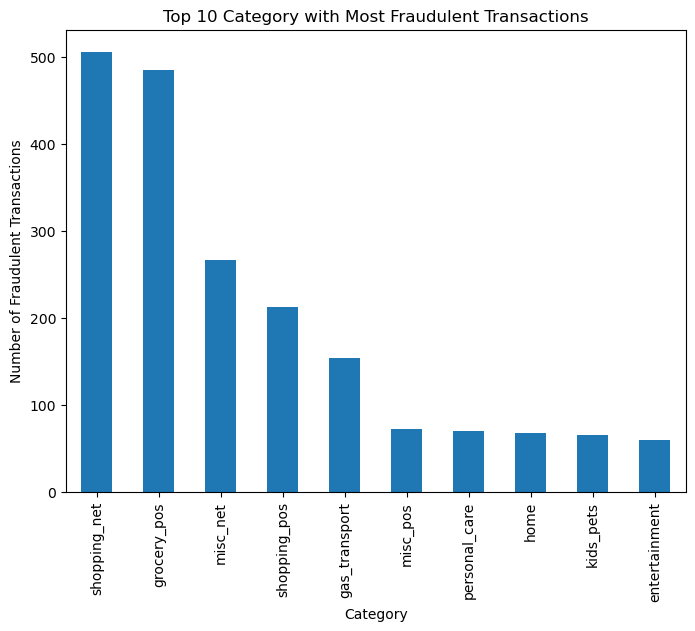

In [26]:
plt.figure(figsize=(8,6))
top10_cat.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [27]:
fraud_counts_city = df.groupby("city")["is_fraud"].sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Camden'),
  Text(1, 0, 'Birmingham'),
  Text(2, 0, 'Burrton'),
  Text(3, 0, 'Clarks Mills'),
  Text(4, 0, 'Bradley'),
  Text(5, 0, 'Chatham'),
  Text(6, 0, 'Jay'),
  Text(7, 0, 'Reynolds'),
  Text(8, 0, 'Bristol'),
  Text(9, 0, 'Carlotta')])

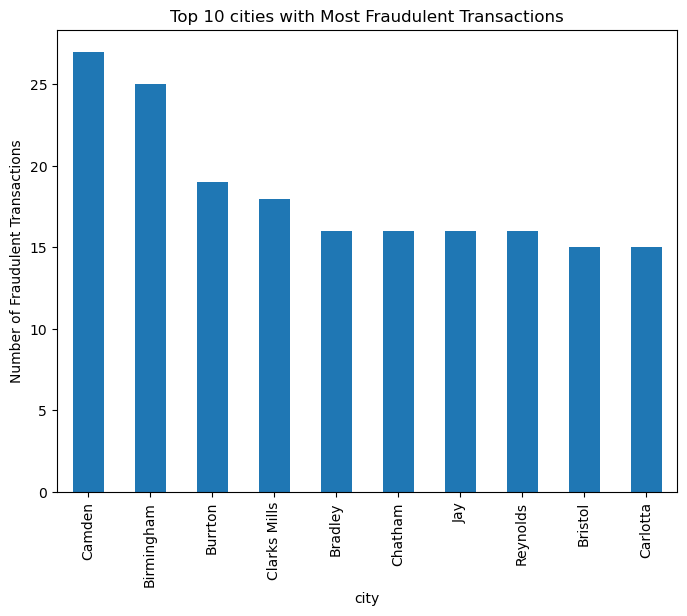

In [28]:
plt.figure(figsize=(8,6))
fraud_counts_city.nlargest(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [29]:
fraud_counts_job = df.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Science writer'),
  Text(1, 0, 'Licensed conveyancer'),
  Text(2, 0, 'Systems developer'),
  Text(3, 0, 'Engineer, biomedical'),
  Text(4, 0, 'Colour technologist'),
  Text(5, 0, 'Therapist, occupational'),
  Text(6, 0, 'Comptroller'),
  Text(7, 0, 'Counsellor'),
  Text(8, 0, 'Research scientist (physical sciences)'),
  Text(9, 0, 'Commissioning editor')])

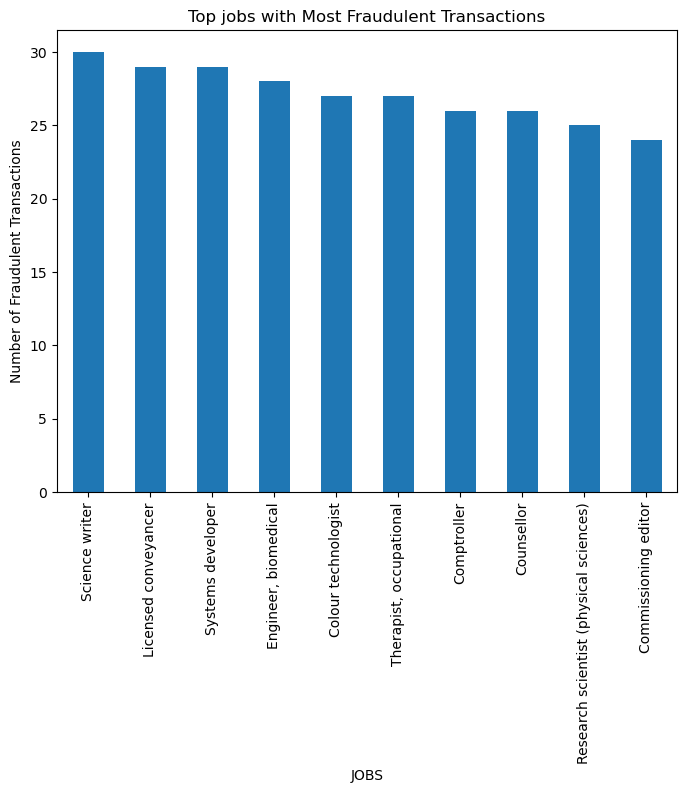

In [30]:
plt.figure(figsize=(8,6))
top10_job.plot(kind="bar")
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [32]:
age_ranges = {
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}

In [33]:
df["age_group"] = np.where(df["age_cust"] < 13, "Child", np.where(df["age_cust"] < 20, "Teen", np.where(df["age_cust"] < 55, "Adult", "Senior")))

In [34]:
df["age_group"] = pd.cut(df["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], include_lowest=True)

In [35]:
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age_cust,lat_dist,long_dist,age_group
0,2291163933867244,Kirlin and Sons,personal_care,2.86,M,Columbia,29209,333497,Mechanical engineer,0,12,Sunday,6,52,0.02,0.27,Adult
1,3573030041201292,Sporer-Keebler,personal_care,29.84,F,Altonah,84002,302,"Sales professional, IT",0,12,Sunday,6,30,0.87,0.48,Adult
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,34496,"Librarian, public",0,12,Sunday,6,50,0.18,0.66,Adult
3,3591919803438423,Haley Group,misc_pos,60.05,M,Titusville,32780,54767,Set designer,0,12,Sunday,6,33,0.24,0.06,Adult
4,3526826139003047,Johnston-Casper,travel,3.19,M,Falmouth,49632,1126,Furniture designer,0,12,Sunday,6,65,0.71,0.87,Senior


In [36]:
fraud_counts_age = df.groupby("age_group")["is_fraud"].sum()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Adult'),
  Text(3, 0, 'Senior')])

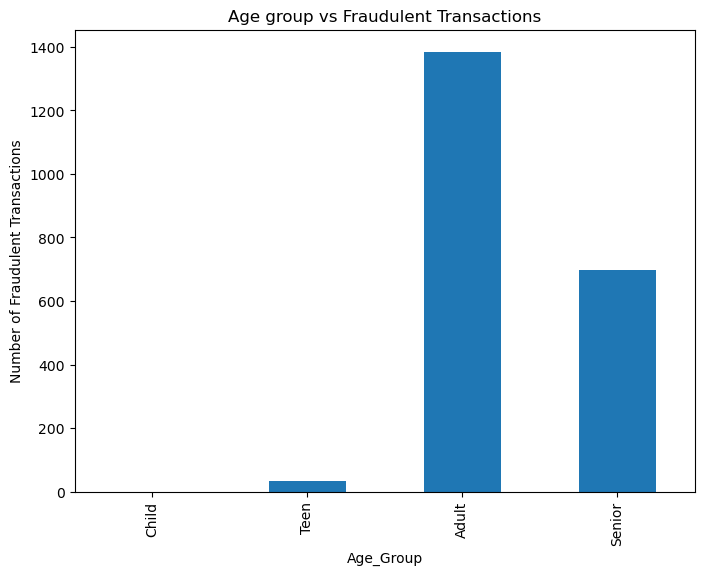

In [37]:
plt.figure(figsize=(8,6))
fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)

In [38]:
df.drop(columns=['merchant', 'job', 'category', 'city', 'day'],inplace=True)

In [39]:
dummies = pd.get_dummies(df, drop_first=True, dtype="int32",
        columns=["age_group", "gender"])

In [40]:
dummies

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,2291163933867244,2.86,29209,333497,0,12,6,52,0.02,0.27,0,1,0,1
1,3573030041201292,29.84,84002,302,0,12,6,30,0.87,0.48,0,1,0,0
2,3598215285024754,41.28,11710,34496,0,12,6,50,0.18,0.66,0,1,0,0
3,3591919803438423,60.05,32780,54767,0,12,6,33,0.24,0.06,0,1,0,1
4,3526826139003047,3.19,49632,1126,0,12,6,65,0.71,0.87,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,519,0,23,12,54,0.55,0.56,0,1,0,1
555715,3556613125071656,111.84,77566,28739,0,23,12,21,0.62,0.75,0,1,0,1
555716,6011724471098086,86.88,99323,3684,0,23,12,39,0.46,0.81,0,1,0,0
555717,4079773899158,7.99,83643,129,0,23,12,55,0.15,0.63,0,1,0,1


In [41]:
new_df = dummies
new_df.head()

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,2291163933867244,2.86,29209,333497,0,12,6,52,0.02,0.27,0,1,0,1
1,3573030041201292,29.84,84002,302,0,12,6,30,0.87,0.48,0,1,0,0
2,3598215285024754,41.28,11710,34496,0,12,6,50,0.18,0.66,0,1,0,0
3,3591919803438423,60.05,32780,54767,0,12,6,33,0.24,0.06,0,1,0,1
4,3526826139003047,3.19,49632,1126,0,12,6,65,0.71,0.87,0,0,1,1


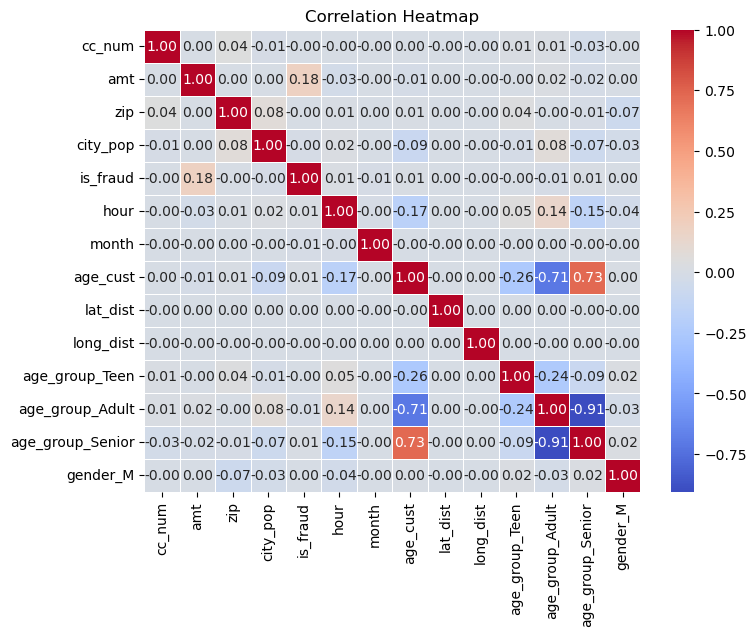

In [42]:
# Calculate correlation matrix
correlation_matrix = new_df.corr()

# Plotting a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
fraud_correlation = new_df.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud            1.000000
amt                 0.182267
month               0.011748
hour                0.011686
age_group_Senior    0.009223
age_cust            0.007513
age_group_Adult     0.007294
city_pop            0.004910
age_group_Teen      0.003403
zip                 0.002271
cc_num              0.001540
lat_dist            0.000969
gender_M            0.000748
long_dist           0.000275
Name: is_fraud, dtype: float64


In [44]:
x = new_df.drop('is_fraud',axis = 1)
y = new_df['is_fraud']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=65)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
zero = new_df[new_df["is_fraud"]==0]
one = new_df[new_df["is_fraud"]==1]

In [48]:
down = resample(zero, replace=False, n_samples=len(one))
down

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
374519,4560395181594436016,1524.54,95453,11256,0,13,11,48,0.50,0.17,0,1,0,0
168044,6011679934075347,11.70,82063,100,0,19,8,46,0.04,0.73,0,1,0,0
230298,4424338559877976,116.00,43330,118,0,7,9,63,0.63,0.94,0,0,1,0
190236,4451438912406400,29.97,71960,1383,0,19,8,21,0.62,0.48,0,1,0,0
254668,4067137330196900,40.30,35554,1186,0,9,9,34,0.32,0.45,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509314,4503101193493052864,44.66,33811,237282,0,16,12,41,0.14,0.71,0,1,0,0
292472,3563837241599446,37.70,97132,28278,0,10,10,43,0.35,0.77,0,1,0,1
137554,375904527651269,4.65,68973,463,0,18,8,72,0.55,0.71,0,0,1,1
131897,4826655832045236,41.58,2630,1850,0,6,8,57,0.72,0.77,0,0,1,0


In [49]:
down_samples = pd.concat([one, down], axis=0)
down_samples

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
1685,3560725013359375,24.84,79759,23,1,22,6,51,0.72,0.14,0,1,0,0
1767,6564459919350820,780.52,53803,1306,1,22,6,62,0.09,0.80,0,0,1,1
1781,6564459919350820,620.33,53803,1306,1,22,6,62,0.22,0.19,0,0,1,1
1784,4005676619255478,1077.69,70726,71335,1,22,6,26,0.75,0.64,0,1,0,1
1857,3560725013359375,842.65,79759,23,1,23,6,51,0.54,0.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509314,4503101193493052864,44.66,33811,237282,0,16,12,41,0.14,0.71,0,1,0,0
292472,3563837241599446,37.70,97132,28278,0,10,10,43,0.35,0.77,0,1,0,1
137554,375904527651269,4.65,68973,463,0,18,8,72,0.55,0.71,0,0,1,1
131897,4826655832045236,41.58,2630,1850,0,6,8,57,0.72,0.77,0,0,1,0


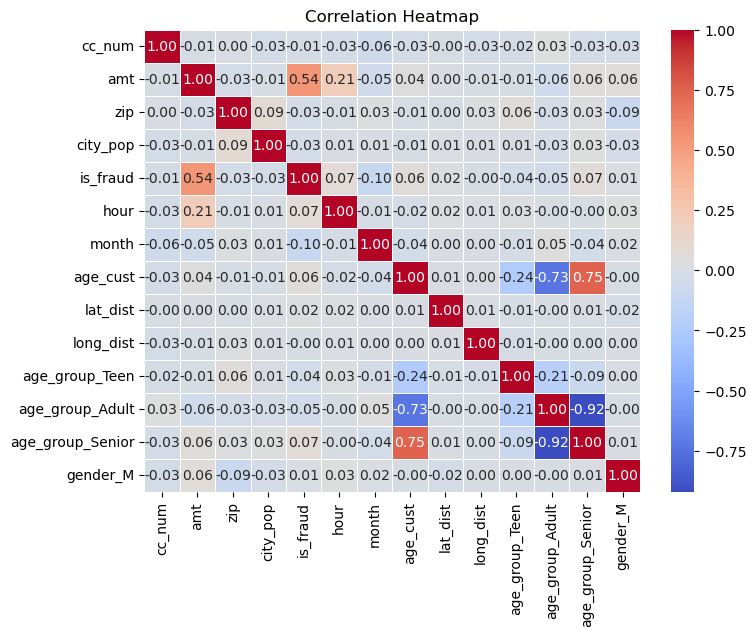

In [50]:
# Calculate correlation matrix
correlation_matrix = down_samples.corr()

# Plotting a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [51]:
fraud_correlation = down_samples.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud            1.000000
amt                 0.535782
month               0.104535
hour                0.070530
age_group_Senior    0.065389
age_cust            0.059261
age_group_Adult     0.048527
age_group_Teen      0.037615
city_pop            0.032170
zip                 0.030521
lat_dist            0.020526
gender_M            0.014525
cc_num              0.013982
long_dist           0.003737
Name: is_fraud, dtype: float64


In [52]:
X_d = down_samples.drop("is_fraud", axis=1)
y_d = down_samples["is_fraud"]

In [53]:
X_tr, X_te, y_tr, y_te = train_test_split(X_d, y_d, train_size=0.8, random_state=65)

In [54]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [55]:
model2 = LogisticRegression()

In [56]:
# training the Logistic Regression Model with Training Data
model2.fit(X_tr, y_tr)

LogisticRegression()

In [57]:
# accuracy on training data
y_pred2 = model2.predict(X_te)

In [58]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_te, y_pred2)
cnf_matrix

array([[403,  23],
       [111, 321]], dtype=int64)

In [59]:
print("Accuracy:", accuracy_score(y_te, y_pred2))

Accuracy: 0.8438228438228438


In [60]:
print("Classification Report:\n", classification_report(y_te, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       426
           1       0.93      0.74      0.83       432

    accuracy                           0.84       858
   macro avg       0.86      0.84      0.84       858
weighted avg       0.86      0.84      0.84       858

